In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    Evaluation metrics for trained model
    
RETURN
------
    {EVALUATION-METRIC}.csv : csv file
        Evaluation metrics scores


EXPORTED FILE(s) LOCATION
-------------------------
    ./models/{NN or CV}/{EXPERIMENT}/{EVALUATION-METRIC}.csv
'''

import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
from scripts import config as src
import numpy as np
import pandas as pd
import datetime as dt
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn
IMPORTANT FOLDER,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/data/external/exper_mouse
DATA_DIR, /home/pgundogdu/projects/data

FILE for USING RETRIEVAL ANALYSIS IS  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/data/external/exper_mouse/3-33_integrated_retrieval_set.txt


In [3]:
experiment = 'exper_melanoma'
loc_output = os.path.join(src.DIR_REPORTS, 'evaluate_skf', experiment)
loc_output

'/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_skf/exper_melanoma'

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_skf/exper_melanoma/metrics_overall_1_layer_signaling.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_skf/exper_melanoma/metrics_overall_2_layer_signaling.csv


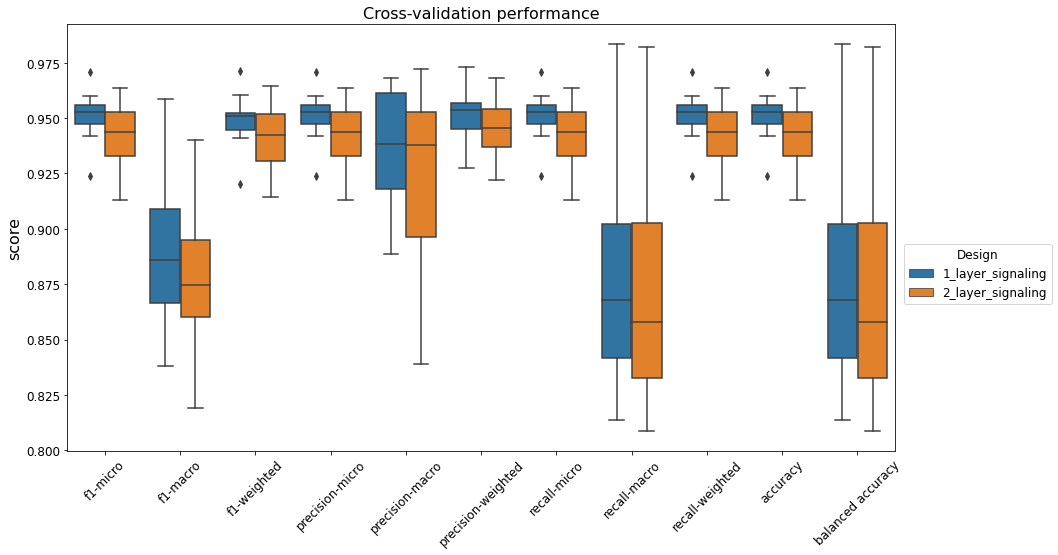

In [4]:
df_metric_overall = pd.DataFrame()
for i in glob.glob(os.path.join(loc_output,'metrics_overall*')):
    print(i)
    df_metric_overall = pd.concat([df_metric_overall, pd.read_csv(i)])

sns.set_palette("tab10")
plt.figure(figsize=(15,8))
sns.boxplot(data=df_metric_overall, x='metric', y='score', hue='design');
plt.xticks(rotation=5)
plt.xlabel('')
# legend = plt.legend(title='Proposed network', loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=False, shadow=False, ncol=2)
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(1.1, 0.5))
legend.get_title().set_fontsize(SMALL_SIZE) #legend 'Title' fontsize
plt.xticks(rotation=45)
plt.title('Cross-validation performance')
plt.tight_layout();
plt.savefig(os.path.join(loc_output,('1_metrics.png')), dpi=300, bbox_inches = 'tight')
plt.savefig(os.path.join(loc_output,('1_metrics.pdf')), dpi=300, bbox_inches = 'tight')
plt.savefig(os.path.join(loc_output,('1_metrics.svg')), dpi=300, bbox_inches = 'tight')

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_skf/exper_melanoma/metrics_detail_2_layer_signaling.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_skf/exper_melanoma/metrics_detail_1_layer_signaling.csv


<Figure size 1080x576 with 0 Axes>

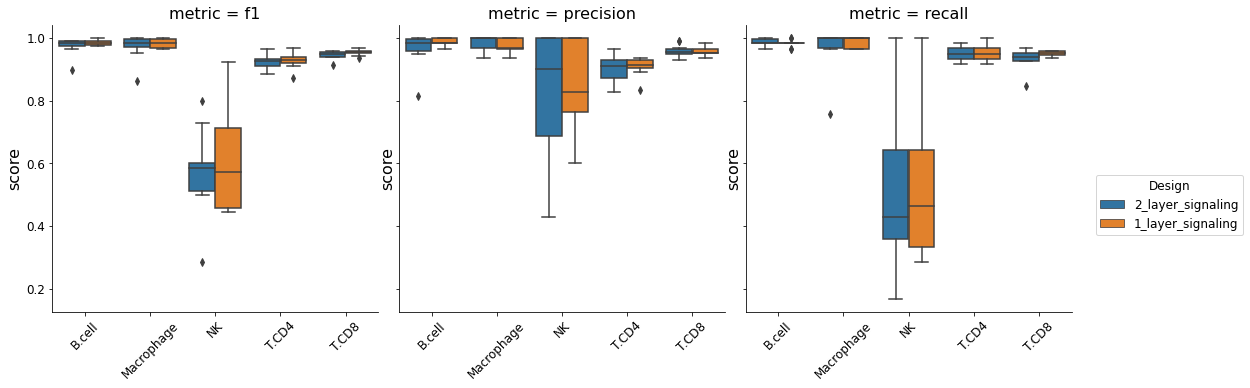

In [8]:
df_metric_detail = pd.DataFrame()
for i in glob.glob(os.path.join(loc_output,'metrics_detail*')):
    print(i)
    df_metric_detail = pd.concat([df_metric_detail, pd.read_csv(i)])

plt.figure(figsize=(15,8));
g=sns.catplot(data=df_metric_detail, x='variable', y='value', hue='design', col='metric', kind="box", legend=False);
g.set(xlabel=None, ylabel='score')
g.set_xticklabels(rotation=45)
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(1.3, 0.5))
legend.get_title().set_fontsize(SMALL_SIZE) #legend 'Title' fontsize
# plt.tight_layout();
plt.savefig(os.path.join(loc_output,'2_f1_precision_recall.png'), dpi=300, bbox_inches = 'tight');
plt.savefig(os.path.join(loc_output,'2_f1_precision_recall.pdf'), dpi=300, bbox_inches = 'tight');
plt.savefig(os.path.join(loc_output,'2_f1_precision_recall.svg'), dpi=300, bbox_inches = 'tight');

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_skf/exper_melanoma/detail_2_layer_signaling_reference_log1p_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_skf/exper_melanoma/detail_1_layer_signaling_reference_log1p_Adam_relu.csv
DESIGN 2_layer_signaling
DESIGN 1_layer_signaling


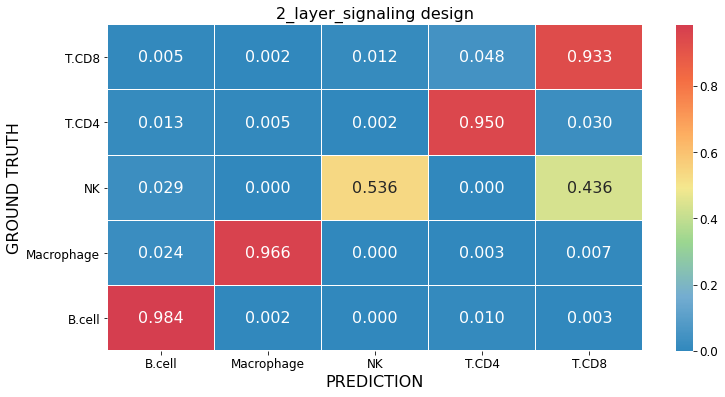

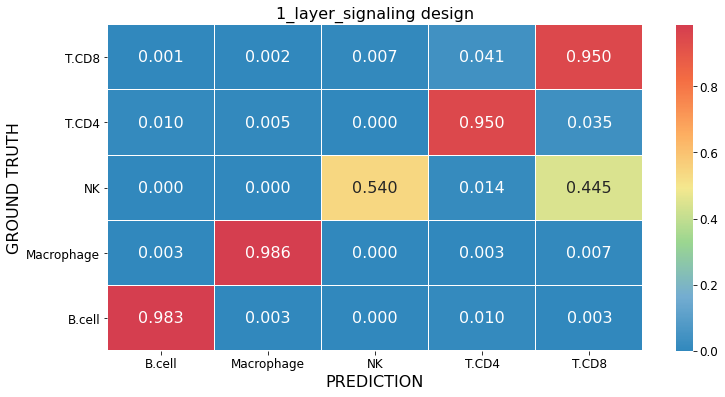

In [6]:
df_result = pd.DataFrame()
for i in glob.glob(os.path.join(loc_output,'detail_*')):
    print(i)
    df_result = pd.concat([df_result, pd.read_csv(i)])
    
for i_design in df_result['design'].unique():
    df_concat = pd.DataFrame()
    print('DESIGN', i_design)
    for i_exp in df_result['index_split'].unique():
#         print('experiment', i_exp)
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
#         print(len(df_temp))
        df_crosstab = pd.crosstab(df_temp['ground_truth'], df_temp['prediction']).div(df_temp['ground_truth'].value_counts(), axis=0)
#         df_concat = pd.concat([df_concat, df_crosstab])
        df_concat = df_concat.add(df_crosstab, fill_value=0)
#     print(i_exp+1)
    plot_cm = src.heatmap_cv(df_concat[::-1]/(i_exp+1), (i_design+' design'))
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.png'), dpi=300, bbox_inches = 'tight')
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.pdf'), dpi=300, bbox_inches = 'tight')
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.svg'), dpi=300, bbox_inches = 'tight')